In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./student_performance_prediction_40k_data.csv')
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [4]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [5]:
 print(df.isnull().sum())

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64


In [6]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}") 

Duplicate rows: 0


In [7]:
# Handle missing values for numerical columns 

df['Study Hours per Week'].fillna(df['Study Hours per Week'].median(), inplace= True)
df['Attendance Rate'].fillna(df['Attendance Rate'].median(), inplace= True)
df['Previous Grades'].fillna(df['Previous Grades'].median(), inplace= True)

In [8]:
#Handle missing values for categorical columns 
df['Participation in Extracurricular Activities'].fillna(df['Participation in Extracurricular Activities'].mode()[0], inplace= True)
df['Parent Education Level'].fillna(df['Parent Education Level'].mode()[0], inplace= True)

In [9]:
#Remove or correct erroneous data
# Correct negative and unrealistic values in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades'

# Study Hours per Week: Remove negative values
df=df[df['Study Hours per Week'] >= 0]

# Attendance Rate: Remove negative values and values above 100%
df=df[(df['Attendance Rate'] >= 0) & (df['Attendance Rate'] <= 100)]
# Previous Grades: Remove values above 100
df=df[df['Previous Grades'] <= 100 ]
# Drop any remaining missing values if needed
data_cleaned =df.dropna()
data_cleaned

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,75.3,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,75.3,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,65.2,Yes,Master,No


In [10]:
# Convert the 'Passed' column to numeric for correlation analysis
data_cleaned['Passed'] = data_cleaned['Passed'].apply(lambda x: 1 if x == 'Yes' else 0)


# 1. Correlation Analysis
correlation_matrix = data_cleaned[['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Passed']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      Study Hours per Week  Attendance Rate  Previous Grades  \
Study Hours per Week              1.000000         0.001968         0.003654   
Attendance Rate                   0.001968         1.000000        -0.002767   
Previous Grades                   0.003654        -0.002767         1.000000   
Passed                           -0.013062         0.001234        -0.003816   

                        Passed  
Study Hours per Week -0.013062  
Attendance Rate       0.001234  
Previous Grades      -0.003816  
Passed                1.000000  


In [11]:
data_cleaned

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,75.3,75.0,Yes,Master,1
1,S00002,9.3,95.3,60.6,No,High School,0
2,S00003,13.2,75.3,64.0,No,Associate,0
3,S00004,17.6,76.8,62.4,Yes,Bachelor,0
4,S00005,8.8,89.3,72.7,No,Master,0
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,0
39996,S39997,11.3,66.4,64.2,No,Doctorate,1
39997,S39998,13.1,65.6,38.1,No,Bachelor,0
39998,S39999,14.1,74.9,65.2,Yes,Master,0


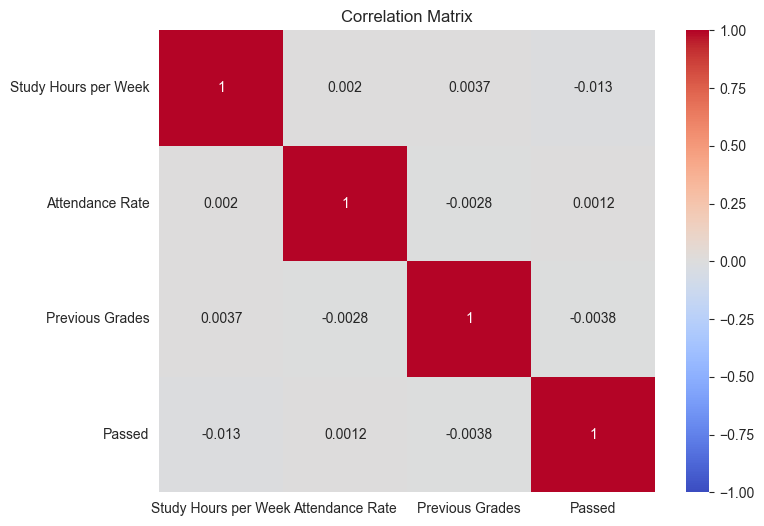

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Effect of Parent Education Level on Student Grades and Passing Rate:
  Parent Education Level  Previous Grades    Passed
0              Associate        64.809489  0.490162
1               Bachelor        64.643527  0.499811
2              Doctorate        64.954413  0.506716
3            High School        64.404419  0.499123
4                 Master        64.809622  0.493432


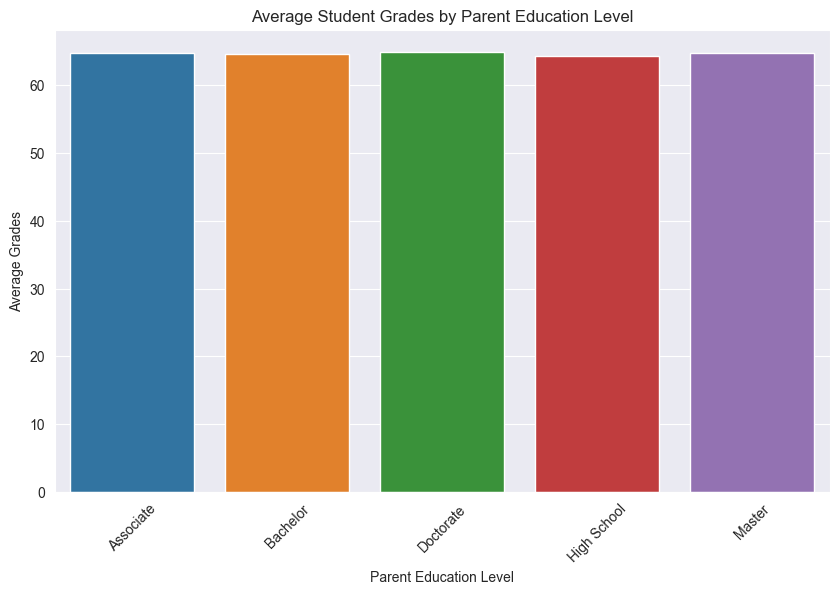

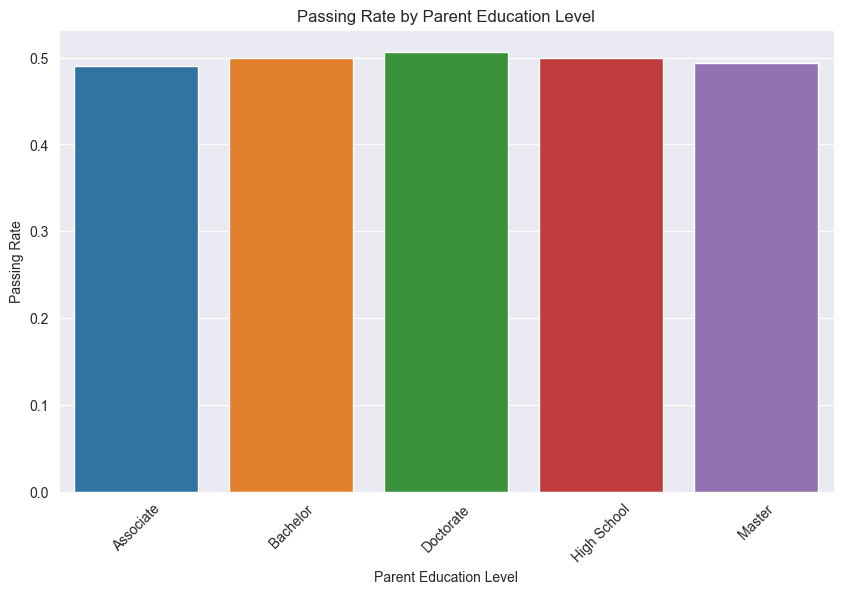

In [13]:
# Analyzing the Effect of Parent Education Level on Student Grades
# Grouping data by Parent Education Level and calculating the mean grades and pass rate
grouped_by_parent_education = data_cleaned.groupby('Parent Education Level').agg({
    'Previous Grades': 'mean',
    'Passed': 'mean'
}).reset_index()

print("Effect of Parent Education Level on Student Grades and Passing Rate:")
print(grouped_by_parent_education)

# 2. Visualizing the relationship between Parent Education Level, Grades, and Passing Rate

# Plotting the average grades by parent education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Parent Education Level', y='Previous Grades', data=grouped_by_parent_education)
plt.title('Average Student Grades by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Average Grades')
plt.xticks(rotation=45)
plt.show()

# Plotting the passing rate by parent education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Parent Education Level', y='Passed', data=grouped_by_parent_education)
plt.title('Passing Rate by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Passing Rate')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Group Comparisons
# Compare the means of the features between students who passed and those who didn't
numeric_columns = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']
grouped_data = data_cleaned.groupby('Passed')[numeric_columns].mean()
print("\nGroup Comparisons (Mean Values):")
print(grouped_data)


Group Comparisons (Mean Values):
        Study Hours per Week  Attendance Rate  Previous Grades
Passed                                                        
0                  10.304336        71.183912        64.773385
1                  10.184386        71.224357        64.665611


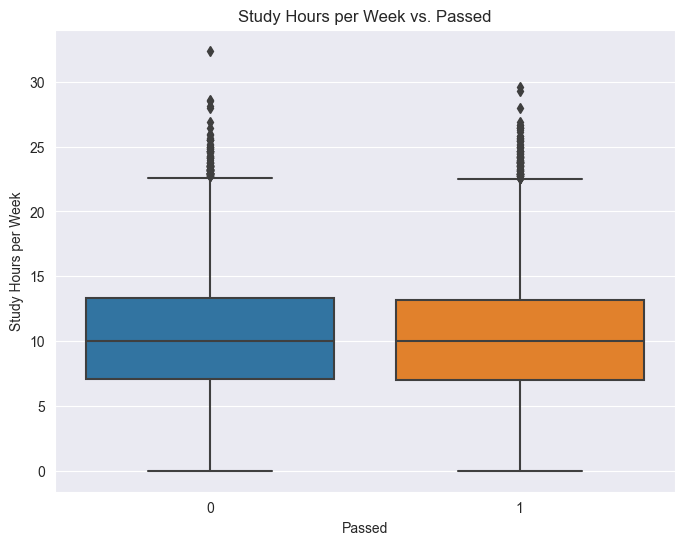

In [15]:
# Visualizing Relationships
# Study Hours vs. Passed
plt.figure(figsize=(8, 6))
sns.boxplot(x='Passed', y='Study Hours per Week', data=data_cleaned)
plt.title('Study Hours per Week vs. Passed')
plt.xlabel('Passed')
plt.ylabel('Study Hours per Week')
plt.show()

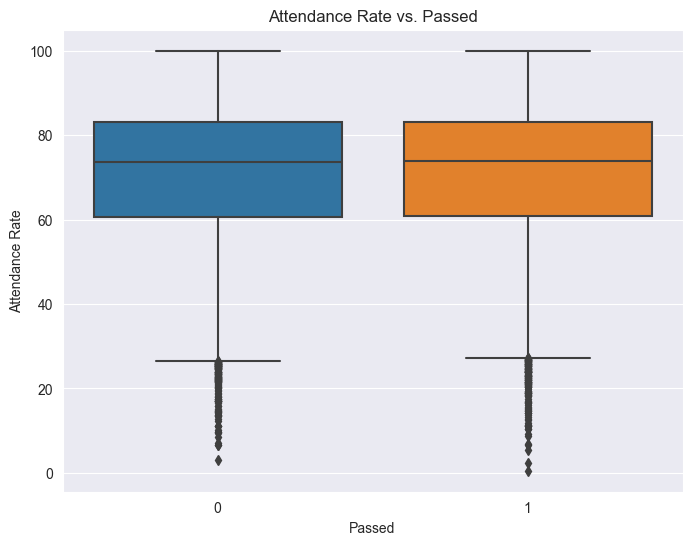

In [16]:
# Attendance Rate vs. Passed
plt.figure(figsize=(8, 6))
sns.boxplot(x='Passed', y='Attendance Rate', data=data_cleaned)
plt.title('Attendance Rate vs. Passed')
plt.xlabel('Passed')
plt.ylabel('Attendance Rate')
plt.show()

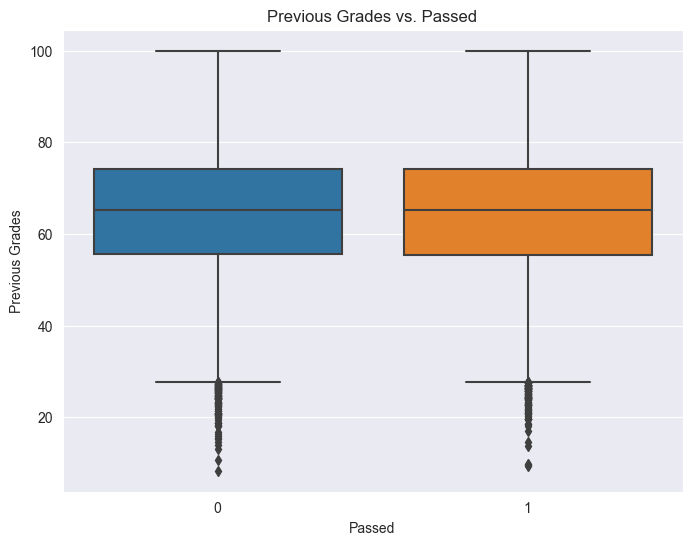

In [17]:
# Previous Grades vs. Passed
plt.figure(figsize=(8, 6))
sns.boxplot(x='Passed', y='Previous Grades', data=data_cleaned)
plt.title('Previous Grades vs. Passed')
plt.xlabel('Passed')
plt.ylabel('Previous Grades')
plt.show()

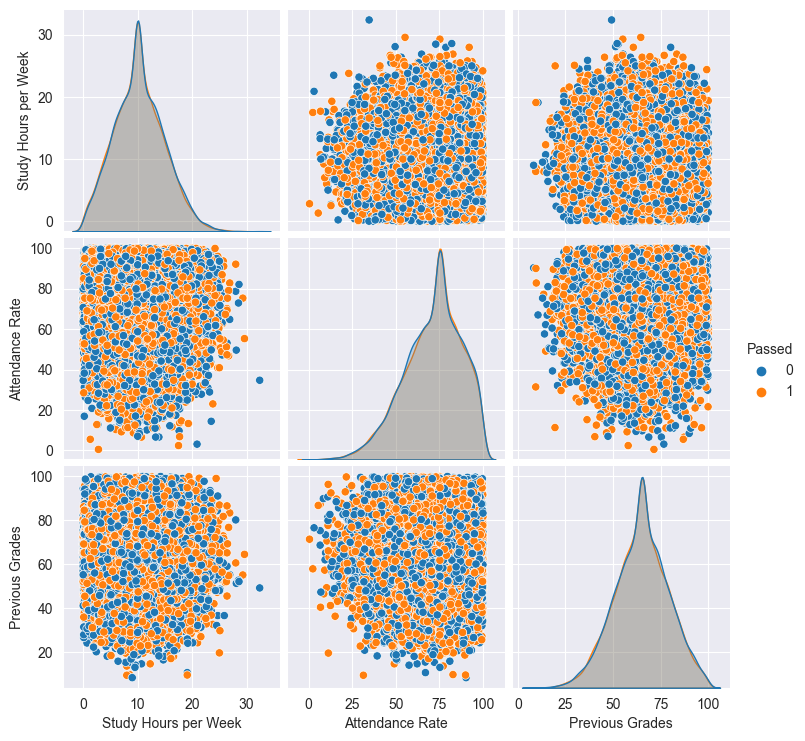

In [18]:
# Pairplot to visualize relationships among all variables
sns.pairplot(data_cleaned[['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Passed']], hue='Passed', diag_kind='kde')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, roc_curve,auc

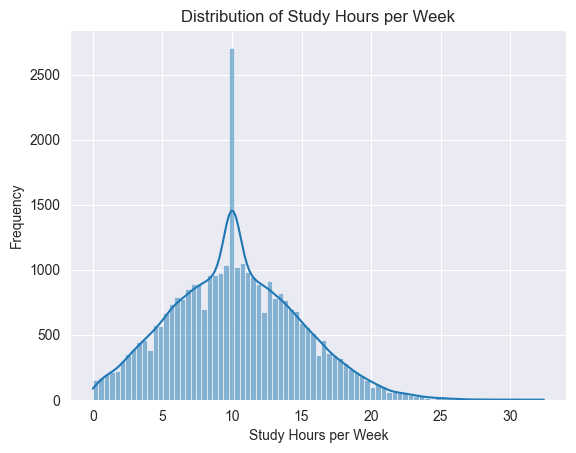

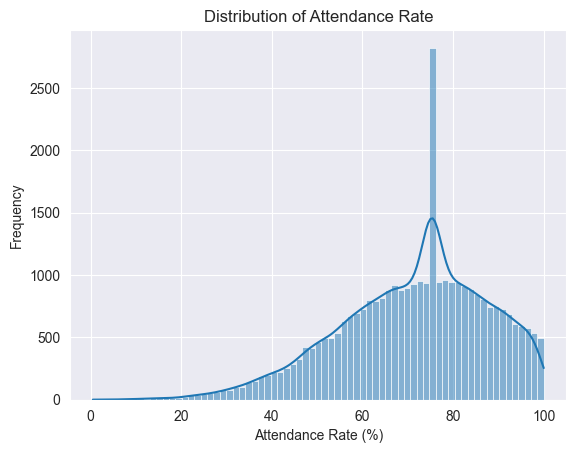

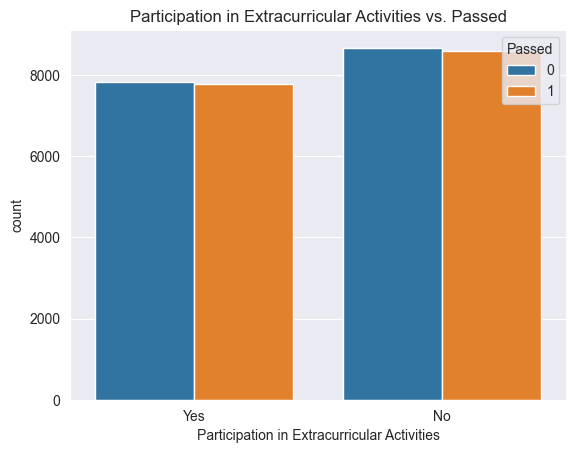

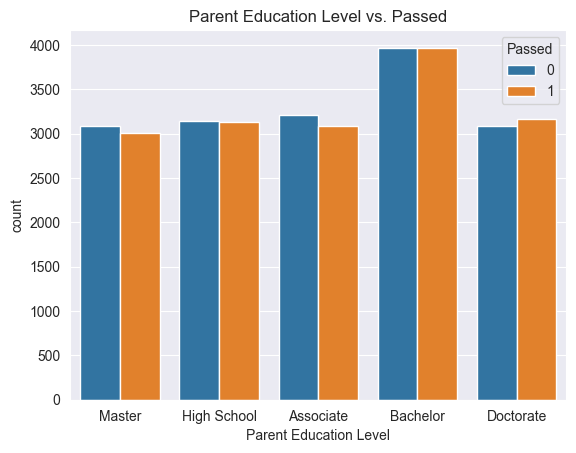

In [20]:
# Exploratory Data Analysis (EDA)
# Distribution of Study Hours per Week
sns.histplot(data_cleaned['Study Hours per Week'], kde=True)
plt.title('Distribution of Study Hours per Week')
plt.xlabel('Study Hours per Week')
plt.ylabel('Frequency')
plt.show()


# Distribution of Attendance Rate
sns.histplot(data_cleaned['Attendance Rate'], kde=True)
plt.title('Distribution of Attendance Rate')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Participation in Extracurricular Activities vs. Passed
sns.countplot(x='Participation in Extracurricular Activities', hue='Passed', data=data_cleaned)
plt.title('Participation in Extracurricular Activities vs. Passed')
plt.show()

# Parent Education Level vs. Passed
sns.countplot(x='Parent Education Level', hue='Passed', data=data_cleaned)
plt.title('Parent Education Level vs. Passed')
plt.show()

In [21]:
# Predictive Modeling
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data_cleaned['Participation in Extracurricular Activities'] = label_encoder.fit_transform(data_cleaned['Participation in Extracurricular Activities'])
data_cleaned['Parent Education Level'] = label_encoder.fit_transform(data_cleaned['Parent Education Level'])
data_cleaned['Passed'] = label_encoder.fit_transform(data_cleaned['Passed'])

In [22]:
# Define features (X) and target (y)
X = data_cleaned.drop(columns=['Student ID', 'Passed'])
y = data_cleaned['Passed']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model_rf= RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf= model_rf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
[[2600 2234]
 [2677 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.54      0.51      4834
           1       0.51      0.47      0.49      5021

    accuracy                           0.50      9855
   macro avg       0.50      0.50      0.50      9855
weighted avg       0.50      0.50      0.50      9855


Accuracy Score: 0.5016742770167427


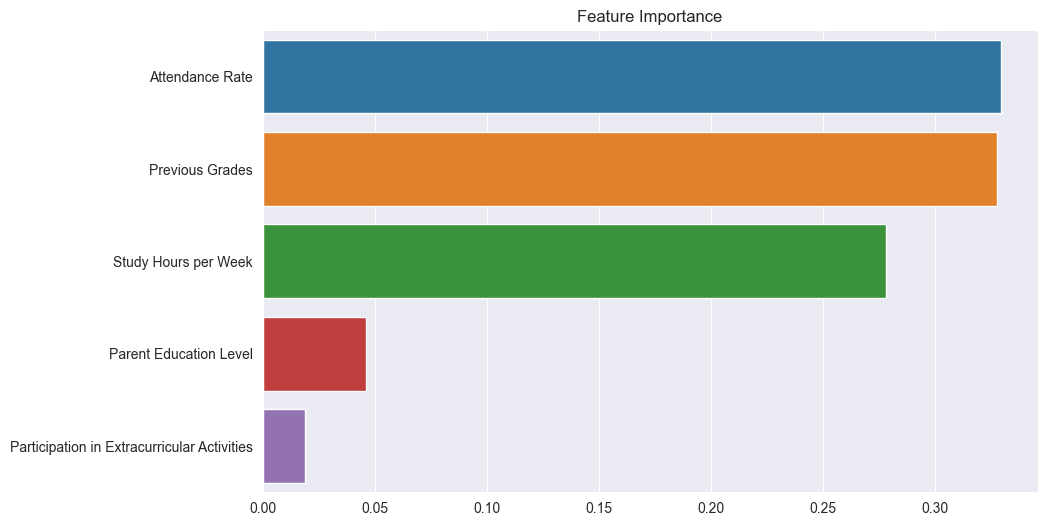

In [23]:
# Feature importance
feature_importance = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

Accuracy: 0.49
Confusion Matrix:
[[4030  804]
 [4175  846]]


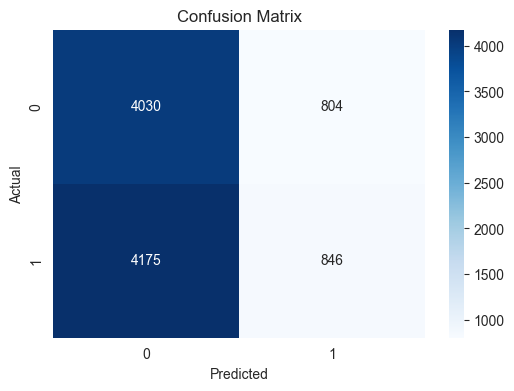

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.83      0.62      4834
           1       0.51      0.17      0.25      5021

    accuracy                           0.49      9855
   macro avg       0.50      0.50      0.44      9855
weighted avg       0.50      0.49      0.43      9855



In [24]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

In [25]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.50


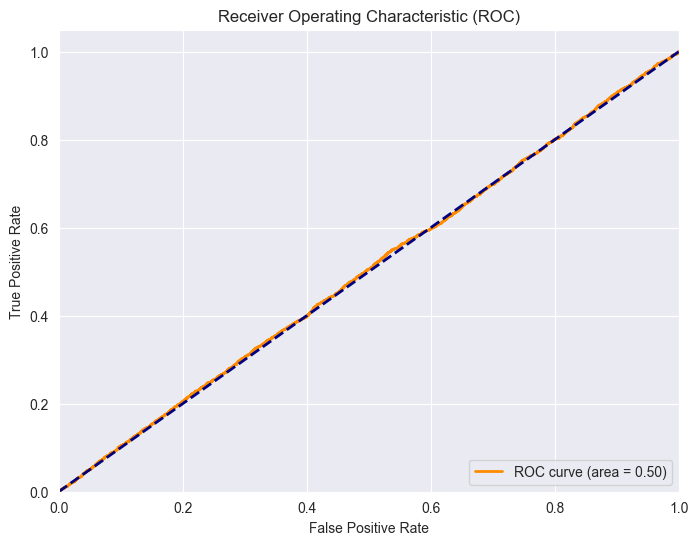

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [27]:
# Create a DataFrame
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred, 'RandomForest': y_pred_rf})

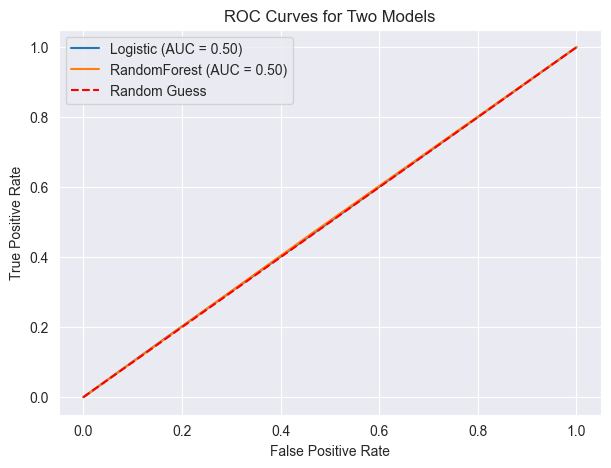

In [28]:
# Plot ROC curve for each model
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
0.5038493890611601
